# Data Preprocessing

In [222]:
import pandas as pd
from collections import Counter
import numpy as np

# Importing csv files
data = pd.read_csv('food_kor.csv')

data = pd.DataFrame(data)


data1 = pd.read_csv('processed_food.csv')

data1 = pd.DataFrame(data1)

<ipython-input-222-7656f3bac858>:11: DtypeWarning: Columns (10,12,14,16,17,30,90) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('processed_food.csv')


In [223]:
print("size of first dataset:",data.shape)
print("size of second dataset:", data1.shape)

size of first dataset: (7704, 100)
size of second dataset: (77773, 91)


In [224]:
# Data navigation (data information and statistics summary)
print("----------Information of Food dataset----------")
# print(data.info())
# print("---------------------------------------")
# print("\n")
print("----------Statistical of Food dataset----------")
# print(data.describe())
# print("-----------------------------------------------------------")
# print("\n")


# Select the attributes required for data analysis
selected_features = ['식품명', '에너지(㎉)', '지방(g)',
                     '총 포화 지방산(g)', '콜레스테롤(㎎)',
                     '나트륨(㎎)', '탄수화물(g)',
                     '총당류(g)', '단백질(g)','비타민 C(㎎)', '칼슘(㎎)']

data = data[selected_features]
data1 = data1[selected_features]

# Reset Attribute Name
new_column_names = ['name', 'calories', 'total_fat',
                    'sat_fat', 'cholesterol', 'sodium',
                    'total_carb', 'sugar', 'protein',
                    'vit_c', 'calcium']

data = data.rename(columns=dict(zip(selected_features, new_column_names)))
data1 = data1.rename(columns=dict(zip(selected_features, new_column_names)))

----------Information of Food dataset----------
----------Statistical of Food dataset----------


In [225]:
# Merge the two dataset
data = pd.concat([data,data1])
print(data.head())

   name calories total_fat sat_fat cholesterol   sodium total_carb sugar  \
0  꿩불고기    368.8       8.5     1.9      106.18  1264.31       39.7  16.9   
1   닭갈비   595.61      25.8       6       193.4  1535.83       44.9  21.2   
2   닭갈비   558.47      31.6    11.3      217.67  1016.94       23.1   8.5   
3   닭꼬치   176.72      8.57    2.32       31.44   286.91      13.35  3.15   
4  더덕구이      184       5.2     0.8        0.12   743.37       31.1  11.6   

  protein vit_c calcium  
0    33.5  2.99  105.61  
1    45.9  5.54   98.64  
2    45.5     0   63.06  
3   11.56     0   17.68  
4     3.1  1.34   46.42  


Code to determine which values are stored as strings in each column

In [226]:
# Code for output without omitting any rows
pd.set_option('display.max_rows', None)
# Code for output without omitting any columns
pd.set_option('display.max_columns', None)
# Code for output without restriction
np.set_printoptions(threshold=np.inf)

In [227]:
string_values = data.loc[data['calcium'].apply(lambda x: isinstance(x, str)), 'calcium']

# Get the unique string values
unique_values = string_values.unique()

# Print the unique string values
unique_values

array(['105.61', '98.64', '63.06', '17.68', '46.42', '158.8', '47.21',
       '80.44', '12.31', '164.09', '85.27', '31.21', '215.4', '267.44',
       '29.52', '82.51', '280.1', '38.49', '1320.57', '711.95', '194.25',
       '113.75', '99.72', '123.61', '115.56', '125.77', '90.18', '27.34',
       '369.14', '670.27', '206.72', '59.21', '149.32', '105.32',
       '213.27', '391.17', '198.55', '656.62', '76.47', '227.69',
       '164.63', '32.84', '33.73', '164.34', '72.17', '212.11', '185.95',
       '95.99', '78.43', '333.22', '44.36', '25.64', '39.42', '38.84',
       '74.62', '18.5', '62.25', '10.41', '12.33', '25.81', '35.64',
       '9.71', '70.51', '16.99', '17.24', '21.03', '18.14', '16.67',
       '9.62', '12', '116.47', '444.79', '340.44', '291.83', '114.43',
       '130.19', '85.36', '176.6', '113.24', '212.09', '120.73', '400.51',
       '41.12', '257.24', '177.78', '111.09', '245.1', '79.1', '188.22',
       '292.43', '81.92', '586.78', '337.25', '241.45', '214.54',
       '1

In [228]:
# Returns the number of rows with missing value
#print((data == '-').sum(axis=0))

count = (data == '-').sum(axis=0)
print("Number of coulmns with '-' :", count)

# Replaces all data stored as strings with a float type
data = data.replace('-', np.nan)
data = data.replace('1g 미만', 0)
data = data.replace('0.5미만', 0)
data = data.replace('0.5g미만', 0)
data = data.replace('0.5g 미만', 0)
data = data.replace('0.5 미만', 0)
data = data.replace('1g미만', 0)
data = data.replace('1g 미만', 0)
data = data.replace('5 미만', 0)
data = data.replace('5미만', 0)
data = data.replace('5mg미만', 0)
data = data.replace('5mg 미만', 0)
data = data.replace('2미만', 0)
data = data.replace('2g미만', 0)
data = data.replace('5이하', 0)
data = data.replace('1 미만', 0)
data = data.replace('3g미만', 0)
data = data.replace('13미만', 12)
data = data.replace('11 미만', 10)
data = data.replace('1미만', 0)
data = data.replace('1 g 미만',0)


Number of coulmns with '-' : name               0
calories         109
total_fat      10346
sat_fat         3560
cholesterol    14603
sodium          2433
total_carb      8673
sugar           1445
protein         2903
vit_c          82879
calcium        81335
dtype: int64


In [229]:
float_cols = ['calories', 'total_fat', 'sat_fat', 'cholesterol', 'sodium', 'total_carb', 'sugar', 'protein', 'vit_c', 'calcium']
data[float_cols] = data[float_cols].astype(float)

print(data.dtypes)

name            object
calories       float64
total_fat      float64
sat_fat        float64
cholesterol    float64
sodium         float64
total_carb     float64
sugar          float64
protein        float64
vit_c          float64
calcium        float64
dtype: object


In [230]:
print("Number of nulls in attribute 'calories'",data["calories"].isnull().sum())
print("Number of nulls in attribute 'total_fat'",data["total_fat"].isnull().sum())
print("Number of nulls in attribute 'sat_fat'",data["sat_fat"].isnull().sum())
print("Number of nulls in attribute 'sodium'",data["sodium"].isnull().sum())
print("Number of nulls in attribute 'total_carb'",data["total_carb"].isnull().sum())
print("Number of nulls in attribute 'sugar'",data["sugar"].isnull().sum())
print("Number of nulls in attribute 'protein'",data["protein"].isnull().sum())
print("Number of nulls in attribute 'vit_c'",data["vit_c"].isnull().sum())
print("Number of nulls in attribute 'calcium'",data["calcium"].isnull().sum())



Number of nulls in attribute 'calories' 109
Number of nulls in attribute 'total_fat' 10346
Number of nulls in attribute 'sat_fat' 3560
Number of nulls in attribute 'sodium' 2433
Number of nulls in attribute 'total_carb' 8673
Number of nulls in attribute 'sugar' 1445
Number of nulls in attribute 'protein' 2903
Number of nulls in attribute 'vit_c' 82879
Number of nulls in attribute 'calcium' 81335


Deleting both attributes because there are too many nulls in attribute 'vit_c' and 'calcium'

In [231]:
data = data.iloc[:,:-2]
print(data.columns)

Index(['name', 'calories', 'total_fat', 'sat_fat', 'cholesterol', 'sodium',
       'total_carb', 'sugar', 'protein'],
      dtype='object')


Find the correlation between the variables and replace it with one variable if there are two variables that have a very strong correlation

             calories  total_fat   sat_fat  cholesterol    sodium  total_carb  \
calories     1.000000   0.393871  0.748779     0.526673  0.215769    0.832764   
total_fat    0.393871   1.000000  0.491199     0.594036  0.089151    0.242074   
sat_fat      0.748779   0.491199  1.000000     0.617545  0.161534    0.477444   
cholesterol  0.526673   0.594036  0.617545     1.000000  0.268497    0.375765   
sodium       0.215769   0.089151  0.161534     0.268497  1.000000    0.184392   
total_carb   0.832764   0.242074  0.477444     0.375765  0.184392    1.000000   
sugar        0.812934   0.241979  0.489582     0.381889  0.114624    0.965501   
protein      0.666086   0.381041  0.714845     0.653890  0.437136    0.495585   

                sugar   protein  
calories     0.812934  0.666086  
total_fat    0.241979  0.381041  
sat_fat      0.489582  0.714845  
cholesterol  0.381889  0.653890  
sodium       0.114624  0.437136  
total_carb   0.965501  0.495585  
sugar        1.000000  0.415754 

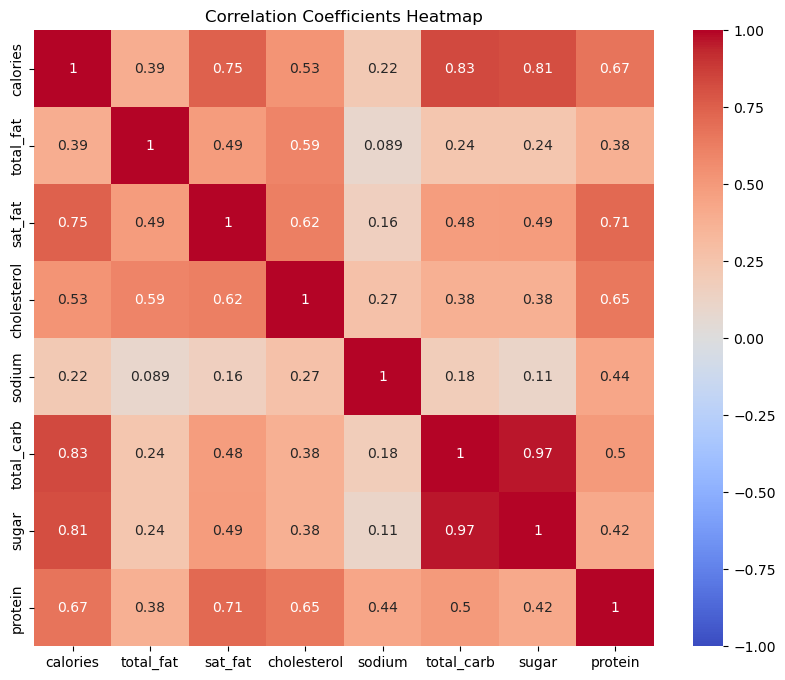

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = data.corr()
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Set the title of the heatmap
plt.title('Correlation Coefficients Heatmap')

# Show the heatmap
plt.show()

There is a very strong correlation (0.97) between 'sugar' and 'total_carb', and there is a strong positive correlation between 'sugar' and 'calories', 'total_carb' and 'calories', respectively (0.81, 0.83)
<br>-> Therefore, replace 'sugar' with 'total_carbs'. Delete attribute 'sugar'

In [233]:
data = data.drop('sugar', axis=1)
print(data.head())

   name  calories  total_fat  sat_fat  cholesterol   sodium  total_carb  \
0  꿩불고기    368.80       8.50     1.90       106.18  1264.31       39.70   
1   닭갈비    595.61      25.80     6.00       193.40  1535.83       44.90   
2   닭갈비    558.47      31.60    11.30       217.67  1016.94       23.10   
3   닭꼬치    176.72       8.57     2.32        31.44   286.91       13.35   
4  더덕구이    184.00       5.20     0.80         0.12   743.37       31.10   

   protein  
0    33.50  
1    45.90  
2    45.50  
3    11.56  
4     3.10  


replace the missing value. Non-robust when replaced by means, so extreme values do not represent the overall data -> Replace with a more robust method : median

In [234]:
# resetting numpy array output options
np.set_printoptions(threshold=10)

In [235]:
# Dataset consisting of columns except 'name' column
data_for_median = data.drop(columns=['name'])

# Calculate the median of each column
median_values = data_for_median.median()

# Replace missing values
for column in data_for_median.columns:
    data[column].fillna(median_values[column], inplace=True)

print(data.head(20))

       name  calories  total_fat  sat_fat  cholesterol   sodium  total_carb  \
0      꿩불고기    368.80       8.50     1.90       106.18  1264.31       39.70   
1       닭갈비    595.61      25.80     6.00       193.40  1535.83       44.90   
2       닭갈비    558.47      31.60    11.30       217.67  1016.94       23.10   
3       닭꼬치    176.72       8.57     2.32        31.44   286.91       13.35   
4      더덕구이    184.00       5.20     0.80         0.12   743.37       31.10   
5      도미구이    397.00      16.50     3.80       211.24  1582.17        2.10   
6      돼지갈비    240.32      14.40     4.70        49.34   404.66        8.10   
7      병어구이    488.00      30.80     8.90       198.51  1567.94        0.20   
8       불고기    395.29      25.20     6.60        68.85   560.71        7.80   
9   붕장어소금구이    296.54      16.20     3.60       167.07   124.75       11.60   
10  소양념갈비구이    989.15      71.60    27.20       186.63  1378.45       26.20   
11    양념왕갈비    480.81      35.30    13.00        58.

In [236]:
# Ensure missing value replacement is successful
data.isnull().sum()

name           0
calories       0
total_fat      0
sat_fat        0
cholesterol    0
sodium         0
total_carb     0
protein        0
dtype: int64

Prior to replacing or eliminating extremes, each food in this dataset has a variety of capacities, which may result in a range of nutritional content levels. Therefore, it aims to eliminate only very extreme values.

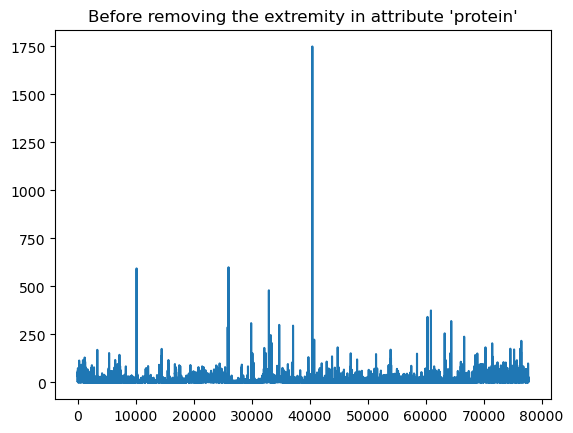

In [237]:
# When viewing a distribution with a histogram, if there is a severe extreme value, 
# the distribution is not easily visible, so check the distribution with a plot
plt.plot(data["protein"])
plt.title("Before removing the extremity in attribute 'protein'")
plt.show()

In [238]:
data[data["protein"]>1000]

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein
40456,베리컬리벗 다크초콜릿,122500.0,8500.0,4000.0,5000.0,10000.0,10000.0,1500.0
40457,베리컬리벗 밀크초콜릿,134500.0,8500.0,5500.0,8000.0,10000.0,13000.0,1500.0
40458,베리컬리벗 화이트초콜릿,135750.0,7775.0,4675.0,6625.0,24750.0,14650.0,1750.0


In [239]:
# Remove rows with values greater than 1000 from the "protein" column
data = data[data['protein'] < 1000]

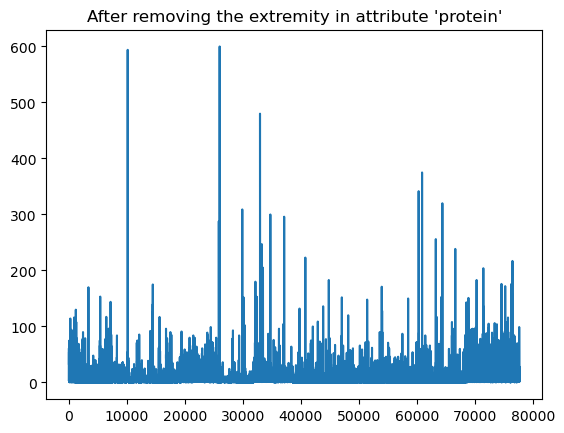

In [240]:
# After removing the extremity
plt.plot(data["protein"])
plt.title("After removing the extremity in attribute 'protein'")
plt.show()

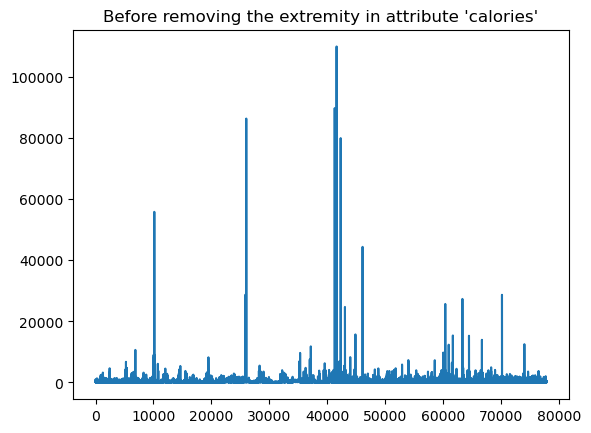

In [241]:
plt.plot(data["calories"])
plt.title("Before removing the extremity in attribute 'calories'")
plt.show()

In [242]:
# Remove rows with values greater than 10000 from the "calories" column
# Since the food we eat in our daily lives does not exceed 10,000 kcal
data = data[data['calories'] < 10000]

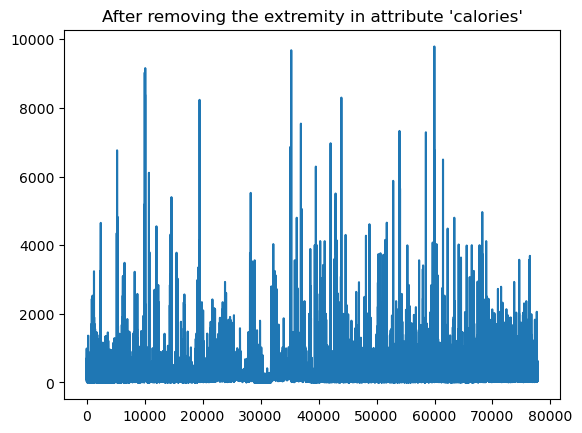

In [243]:
# After removing the extremity
plt.plot(data["calories"])
plt.title("After removing the extremity in attribute 'calories'")
plt.show()

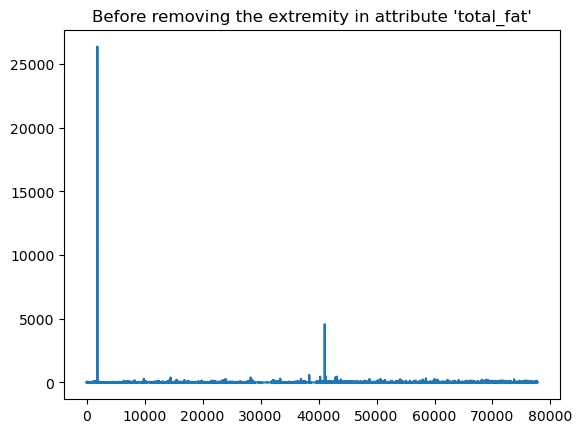

In [244]:
# When viewing a distribution with a histogram, if there is a severe extreme value, 
# the distribution is not easily visible, so check the distribution with a plot
plt.plot(data["total_fat"])
plt.title("Before removing the extremity in attribute 'total_fat'")
plt.show()

In [245]:
data[data['total_fat'] > 4000]

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein
1852,월넛치노 venti,807.44,26374.0,5.67,0.765,161.66,127.93,15.37
41059,코브람 에스테이트 퍼스트 하비스트 엑스트라 버진 올리브 오일,4118.00,4575.5,77.60,0.000,0.00,0.00,0.00


For example, "월넛치노 venti", it appears to be a decimal notation error 
<br>-> To correct the value

In [246]:
data.iloc[1852,2] = 26.374

In [247]:
data.iloc[1852,:]

name           월넛치노 venti 
calories            807.44
total_fat           26.374
sat_fat               5.67
cholesterol          0.765
sodium              161.66
total_carb          127.93
protein              15.37
Name: 1852, dtype: object

In [248]:
data = data[data['total_fat'] < 4000]

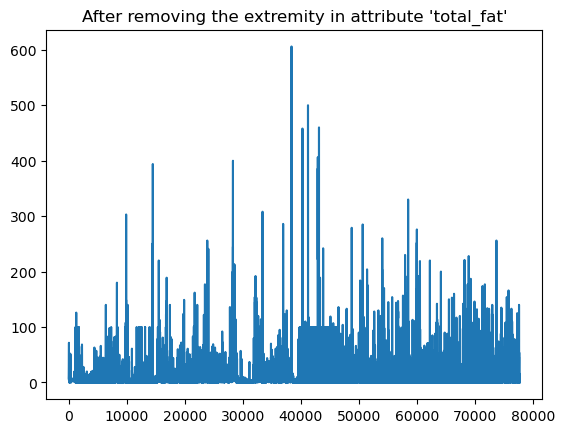

In [249]:
# After removing the extremity
plt.plot(data["total_fat"])
plt.title("After removing the extremity in attribute 'total_fat'")
plt.show()

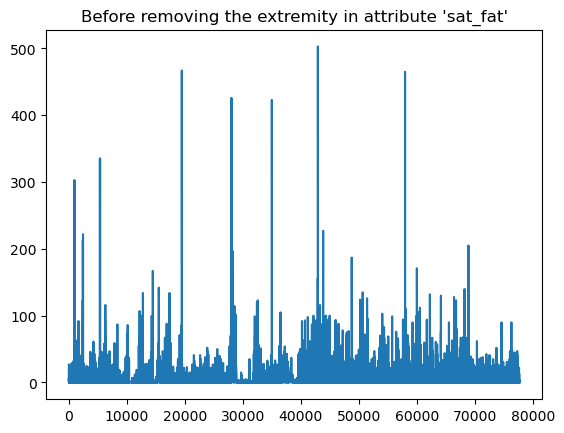

In [250]:
plt.plot(data["sat_fat"])
plt.title("Before removing the extremity in attribute 'sat_fat'")
plt.show()

The attribute "sat_fat" does not show a very large extreme, so it does not remove the extreme.

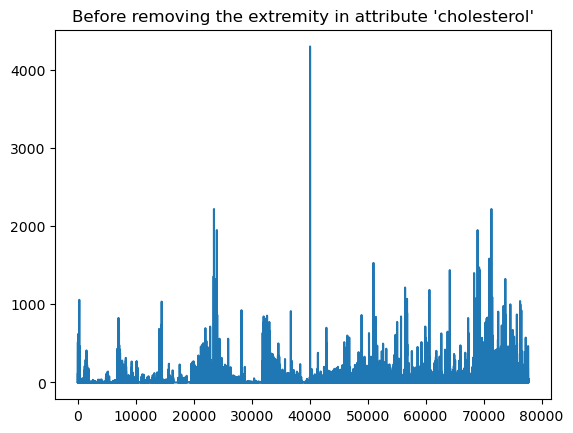

In [251]:
# View the distribution of 'Cholesterol'
plt.plot(data["cholesterol"])
plt.title("Before removing the extremity in attribute 'cholesterol'")
plt.show()

In [252]:
data[data['cholesterol']>4000]

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein
40063,크릴오일,8.4,99.06,21.5,4300.0,0.16,0.0,0.0


In [253]:
data = data[data['cholesterol'] < 4000]

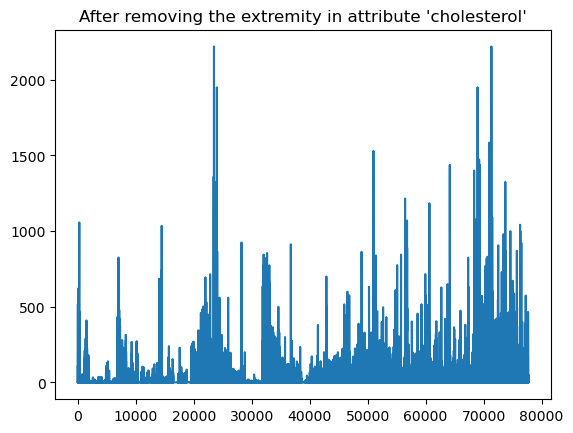

In [254]:
# After removing the extremity
plt.plot(data["cholesterol"])
plt.title("After removing the extremity in attribute 'cholesterol'")
plt.show()

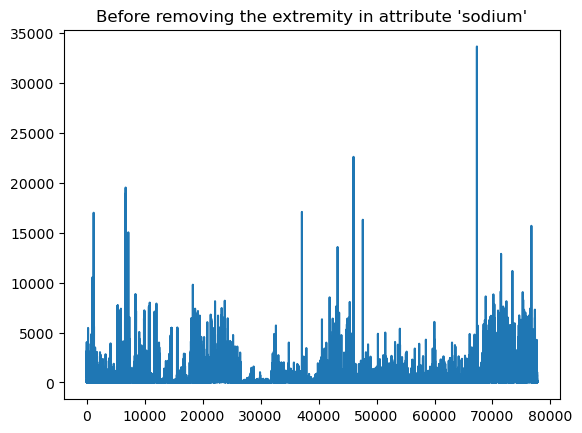

In [255]:
# View the distribution of 'Sodium'
plt.plot(data["sodium"])
plt.title("Before removing the extremity in attribute 'sodium'")
plt.show()

In [256]:
data[data['sodium']>30000]

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein
67313,퀸아망,256.0,8.0,0.0,6.0,33654.0,38.0,9.0


In [257]:
data.loc[data['sodium'].idxmax(),"sodium"] = 336.54

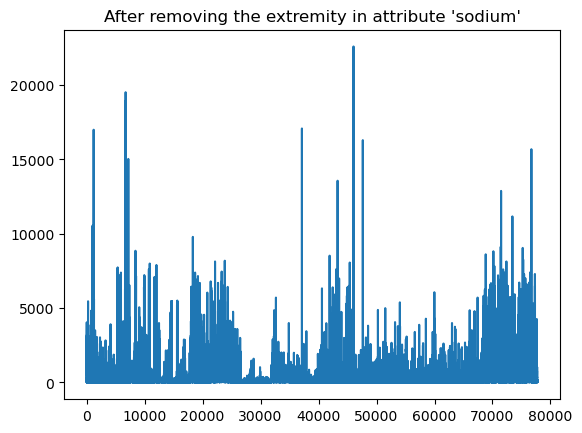

In [258]:
# After removing the extremity
plt.plot(data["sodium"])
plt.title("After removing the extremity in attribute 'sodium'")
plt.show()
# The other values above 20000 are foods that are bound to be high in sodium, 
# such as soy sauce

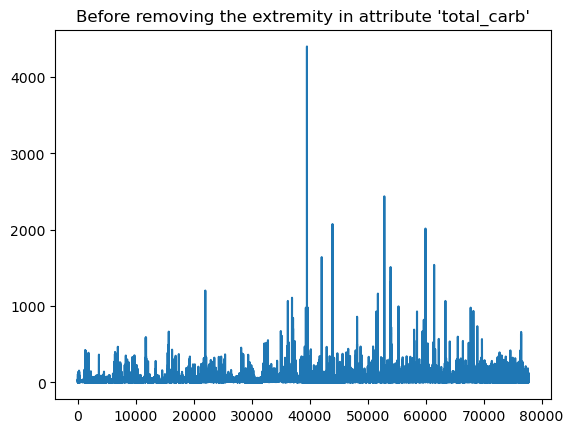

In [259]:
# View the distribution of 'total_carb'
plt.plot(data["total_carb"])
plt.title("Before removing the extremity in attribute 'total_carb'")
plt.show()

In [260]:
data[data["total_carb"]>4000]

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein
39528,스모크 히말라얀 핑크솔트 캐러멜(smoked hiamalayan pink salt ...,186.9,0.8,0.6,36.3,143.5,4401.0,0.8


In [261]:
# Compared to other values, it appears to be a decimal notation error 
# -> Change the value
data.loc[data['total_carb'].idxmax(),"total_carb"] = 44.01

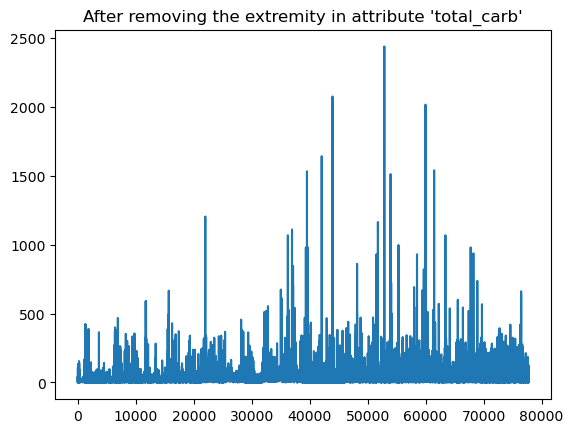

In [262]:
# After removing the extremity
plt.plot(data["total_carb"])
plt.title("After removing the extremity in attribute 'total_carb'")
plt.show()

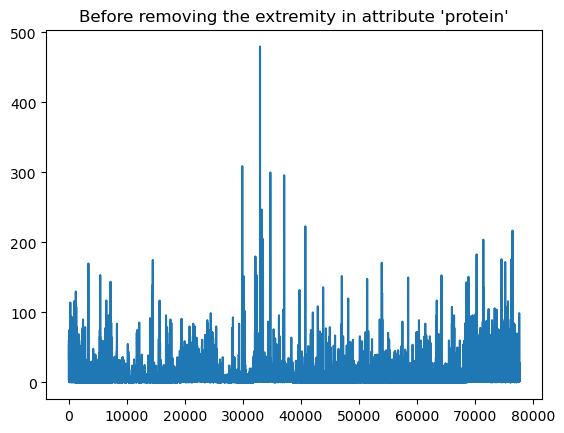

In [263]:
# View the distribution of 'protein'
plt.plot(data["protein"])
plt.title("Before removing the extremity in attribute 'protein'")
plt.show()

In [264]:
data[data['protein'] > 400]

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein
32963,버터크로와상,335.0,17.0,0.0,0.0,480.0,40.0,480.0


In [265]:
# Compared to other values, it appears to be a decimal notation error 
# -> Change the value
data.loc[data['protein'].idxmax(),"protein"] = 4.8

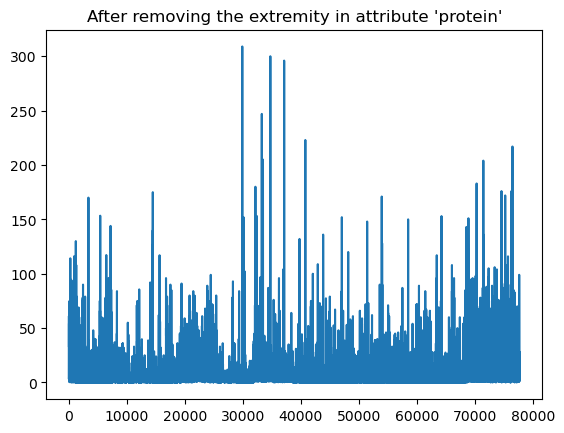

In [266]:
# After removing the extremity
plt.plot(data["protein"])
plt.title("After removing the extremity in attribute 'protein'")
plt.show()

# Scaling the Data
One suitable way to scale the given data is by using a technique called standardization. Standardization adjusts the distribution of each feature by transforming it to have a mean of 0 and a standard deviation of 1. The formula for standardization is as follows:
$Z = {X-E(X) \over \sigma(X)}$

Before Scaling

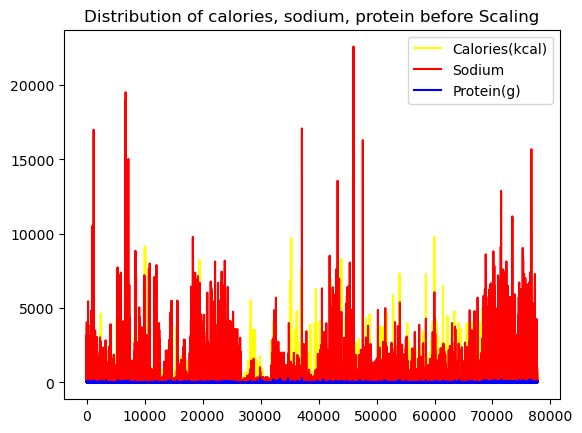

In [267]:
import matplotlib.pyplot as plt
plt.plot(data["calories"],color="yellow",label="Calories(kcal)")
plt.plot(data["sodium"],color="red",label="Sodium")
plt.plot(data["protein"],color="blue",label="Protein(g)")
plt.title("Distribution of calories, sodium, protein before Scaling")
plt.legend()
plt.show()

The units and distribution of each attribute are different, so when you draw a plot, some attributes are invisible at all. Attributes such as "sodium" might have too much influence if data is not being scaled

In [271]:
from sklearn.preprocessing import StandardScaler
df = data.copy()


# Exclude columns 'name' because they are not scaled.
numeric_columns = df.columns[1:]

# Create StandardScaler objects and convert data for standardization
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("-----------prestandard dataset----------")
print(data.head())
print("\n\n")
print("------dataset after standardization-----")
print(df.head())

-----------prestandard dataset----------
   name  calories  total_fat  sat_fat  cholesterol   sodium  total_carb  \
0  꿩불고기    368.80       8.50     1.90       106.18  1264.31       39.70   
1   닭갈비    595.61      25.80     6.00       193.40  1535.83       44.90   
2   닭갈비    558.47      31.60    11.30       217.67  1016.94       23.10   
3   닭꼬치    176.72       8.57     2.32        31.44   286.91       13.35   
4  더덕구이    184.00       5.20     0.80         0.12   743.37       31.10   

   protein  
0    33.50  
1    45.90  
2    45.50  
3    11.56  
4     3.10  



------dataset after standardization-----
   name  calories  total_fat   sat_fat  cholesterol    sodium  total_carb  \
0  꿩불고기  0.285549  -0.074091 -0.265052     1.707134  1.309130    0.086308   
1   닭갈비  0.979601   0.930605  0.181447     3.380913  1.697375    0.195944   
2   닭갈비  0.865951   1.267440  0.758629     3.846662  0.955417   -0.263683   
3   닭꼬치 -0.302227  -0.070026 -0.219313     0.272849 -0.088450   -0.469250   
4

In [272]:
df.columns

Index(['name', 'calories', 'total_fat', 'sat_fat', 'cholesterol', 'sodium',
       'total_carb', 'protein'],
      dtype='object')

In [273]:
df.shape 

(85451, 8)

85451 types of food and 8 attributes (12 out of 14 are nutritionally related attributes)

# Labeling the entire dataset


- While I was thinking about how to label data more effectively and faster, I thought it would be easier to divide the clusters and label the data set in two to three dimensions through PCA, that is, principal component analysis. This is because it is easy to identify what each main ingredient means and even create a classification question accordingly.

In [274]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponenets = pca.fit_transform(df.iloc[:,1:])
principalDf = pd.DataFrame(data = principalComponenets, columns = ["PC1","PC2","PC3"])
print(principalDf.head())


        PC1       PC2       PC3
0  2.026448 -2.391811 -1.090706
1  4.075227 -2.792743 -2.317393
2  4.094276 -2.025596 -3.113742
3 -0.180268 -0.359394 -0.532054
4 -0.506465 -0.423583  0.220448


Draw a three-dimensional plot for each PC to see if it has any characteristics in the distribution of data

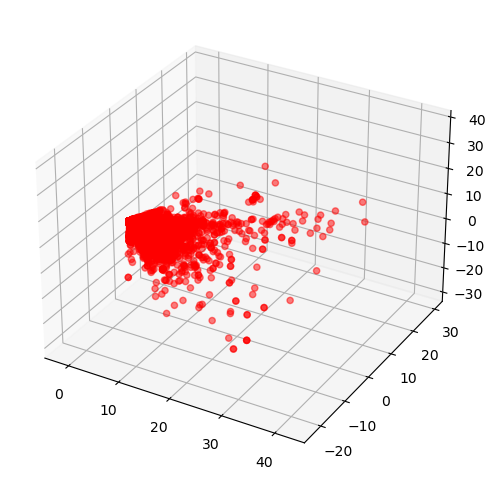

In [275]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

x = principalDf.iloc[:,0]
y = principalDf.iloc[:,1]
z = principalDf.iloc[:,2]

ax.scatter(x, y, z, color = 'r', alpha = 0.5)
plt.show()

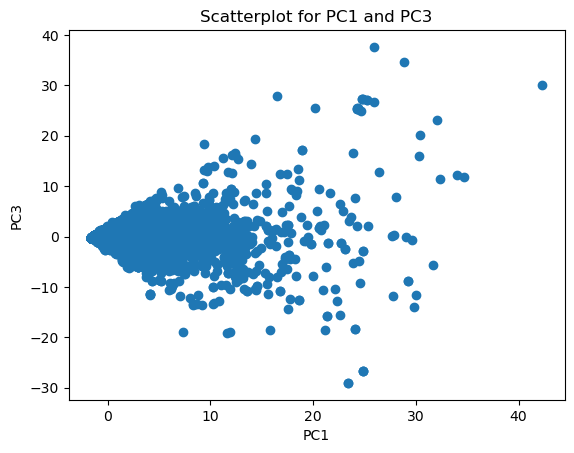

In [276]:
plt.scatter(x,z)
plt.title("Scatterplot for PC1 and PC3")
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.show()

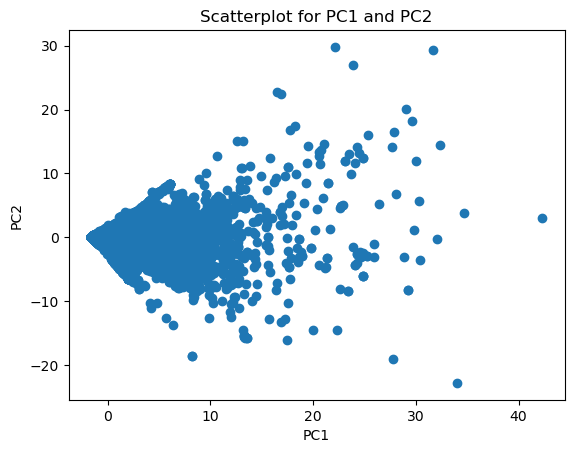

In [110]:
plt.scatter(x,y)
plt.title("Scatterplot for PC1 and PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

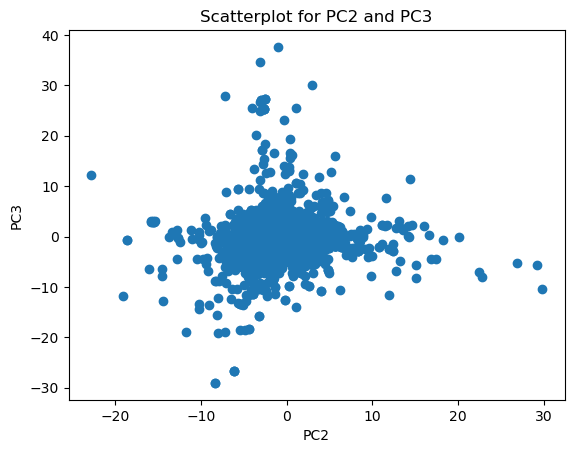

In [277]:
plt.scatter(y,z)
plt.title("Scatterplot for PC2 and PC3")
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.show()

There is no significant feature in the distribution of data according to each PC 
<br>-> Labeling data according to the "2020 Korean Nutrient Consumption Standards" from the Ministry of Health and Welfare

- Prior to that, in order to label, it is necessary to decide which questions to pass according to the user's needs
- For example, if there are 3 views in the first question and 2 views in the second question, this is divided into 6 classes.

- Questions and Views for Labeling

Q1. What is your gender?
    1) male 2) female

Q2. What is your age group?
    1) children and early teens 2) late teens and 30s 
    3) middle-aged and elderly
    
Q3. Choose the purpose of your food intake.
    1) Diet 2) Building muscles 3) To fill the recommended intake
    


- Class1 - male -> children and early teens -> Diet
- Class2 - male -> children and early teens -> Building muscles
- Class3 - male -> children and early teens -> To fill the recommended intake
- Class4 - male -> late teens and 30s -> Diet
- Class5 - male -> late teens and 30s -> Building muscles
- Class6 - male -> late teens and 30s -> To fill the recommended intake
- Class7 - male -> middle-aged and elderly -> Diet
- Class8 - male -> middle-aged and elderly -> Building muscles
- Class9 - male -> middle-aged and elderly -> To fill the recommended intake
- Class10 - female -> children and early teens -> Diet
- Class11 - female -> children and early teens -> Building muscles
- Class12 - female -> children and early teens -> To fill the recommended intake
- Class13 - female -> late teens and 30s -> Diet
- Class14 - female -> late teens and 30s -> Building muscles
- Class15 - female -> late teens and 30s -> To fill the recommended intake
- Class16 - female -> middle-aged and elderly -> Diet
- Class17 - female -> middle-aged and elderly -> Building muscles
- Class18 - female -> middle-aged and elderly -> To fill the recommended intake


Food class for Infant

In [278]:
df['name'] = df['name'].astype('str')

In [279]:
df.loc[(data["calories"] >= 500)& (data["calories"] < 600) & (data["total_carb"] >= 30) & (data["total_carb"] < 40), 'class'] = 1
df[df["class"] == 1]

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein,class
166,참치샌드위치,0.855332,1.470702,0.301240,0.779858,0.810497,0.018840,1.692025,1.0
1221,허니땅콩,0.965494,-0.306391,0.943763,-0.315814,-0.132648,-0.118205,1.867087,1.0
1223,캐슈넛,0.907353,-0.306391,0.290350,-0.315814,-0.435786,-0.012786,1.455176,1.0
7095,참치 샌드위치,0.703247,1.123995,0.246789,0.574329,0.247933,-0.024382,2.005078,1.0
7323,오징어튀김,0.704502,1.348164,0.087791,2.378795,0.223382,-0.041249,1.203910,1.0
7240,이슬먹은 렌지만두 매운맛,0.687029,1.247114,0.889312,0.269203,0.770331,0.066278,0.966031,1.0
7397,청정원 렌지짱 소세지야채볶음,0.843092,1.697194,0.943763,0.245215,1.889224,0.008298,0.734331,1.0
7895,서울 전지분유,0.687029,1.000295,1.488274,1.012828,-0.041135,0.050466,1.970065,1.0
12577,비락 전지 분유,0.717629,1.058370,10.418257,0.014931,0.087556,0.050466,1.970065,1.0
12578,서울전지분유,0.687029,1.000295,7.151190,0.014931,-0.041135,0.050466,1.970065,1.0


In [280]:
df.loc[(data["calories"] >= 700) & (data["calories"] < 800)& ((data['protein']>=20) & (data['protein']<=30)) & (df["class"].isnull()) ,'class']=2
df[df["class"] == 2]

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein,class
147,해물볶음밥,1.315014,1.000295,0.113928,4.309725,1.037507,1.156522,1.877385,2.0
483,화이트 크림 스파게티,1.314341,-0.306391,1.488274,-0.315814,1.427368,-0.202540,2.176021,2.0
941,로제치즈오븐스파게티,1.299041,-0.306391,1.597176,-0.315814,0.731009,-0.202540,2.176021,2.0
945,콘치즈그라탕 L,1.406143,-0.306391,3.666319,-0.315814,0.244844,-0.202540,2.073043,2.0
951,까르보나라스파게티,1.344942,-0.306391,1.052665,-0.315814,0.459329,-0.202540,1.352198,2.0
1025,코코쉬림프(8pcs),1.482644,-0.306391,0.399252,-0.315814,0.738158,-0.202540,1.661131,2.0
1144,젤라또 쉐이크,1.383498,-0.306391,1.847652,-0.315814,0.063963,-0.202540,1.413985,2.0
1459,트리플 치즈 스노우 빙수,1.473464,-0.306391,1.270470,-0.315814,0.001762,-0.202540,2.176021,2.0
2792,치즈까르보나라 스파게티,1.360242,-0.306391,1.597176,-0.315814,1.075614,-0.202540,1.970065,2.0
3053,더블X2,1.390842,-0.306391,2.239700,-0.315814,-0.348562,-0.202540,1.867087,2.0


In [281]:
df.loc[(data["calories"] >= 600) & (data["calories"] < 700 )& (data['protein']<=20)&(df["class"].isnull()),'class']=3
df[df["class"] == 3]

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein,class
85,오일소스스파게티,1.136062,0.792968,-0.048336,0.276304,1.108973,1.134595,1.306888,3.0
120,묵밥,1.122047,-0.120551,-0.308613,0.487973,2.469046,1.960658,0.816713,3.0
125,새우튀김롤,1.012925,0.487494,-0.100609,0.741669,1.490898,1.279230,0.782730,3.0
473,슈퍼곡물 치킨(10조각),1.146038,-0.306391,-0.254162,-0.315814,0.532253,-0.202540,1.043264,3.0
478,포테이토 순살치킨(3조각),1.146038,-0.306391,2.359492,-0.315814,1.107071,-0.202540,1.043264,3.0
949,단호박+고구마샐러드,1.008335,-0.306391,0.181447,-0.315814,0.087556,-0.202540,-0.398426,3.0
1017,국물떡볶이,1.103197,-0.306391,-0.036357,-0.315814,2.371099,-0.202540,0.116463,3.0
1158,이탈리안 에그디쉬,1.243042,-0.306391,1.085336,-0.315814,0.660944,-0.202540,1.166838,3.0
1159,갈릭 치즈 부기브레드,1.078716,-0.306391,-0.262874,-0.315814,0.090416,-0.202540,0.940286,3.0
1170,쿠키&크림 번버거 + 아메리카노 SET,1.000073,-0.306391,1.433823,-0.315814,0.032791,-0.202540,0.219441,3.0


In [282]:
df.loc[(data["calories"] >= 700) & (data["calories"] < 800 )& ((data["total_carb"] >= 30) & (data["total_carb"] < 40)) &(df["class"].isnull()),'class']=4
df[df["class"] == 4]

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein,class
7276,오리탕,1.384998,1.718682,0.395985,4.099207,2.223190,0.017996,5.161350,4.0
28117,파베생초콜릿 다크,1.299041,3.265217,3.884123,0.820925,-0.437216,0.029382,-0.192470,4.0
28312,크리스토필 화이트,1.332701,3.090992,2.795101,-0.176972,-0.498701,-0.076037,-0.295448,4.0
32238,쌀앙버터,1.482644,3.090992,3.884123,2.797528,-0.001098,0.029382,0.425397,4.0
45378,피닉스브랜드 빈버미셀리,1.299041,-0.567728,-0.471966,-0.330494,-0.498701,-0.012786,-0.707360,4.0
60073,쌀앙버터,1.482644,3.090992,3.884123,2.797528,-0.001098,0.029382,0.425397,4.0
70685,든든한 장어구이,1.452044,2.452168,0.943763,8.593004,1.976447,-0.097121,3.308778,4.0


In [283]:
df.loc[(data["calories"] >= 800) & (data["calories"] < 900)& ((data['protein']>=25) & (data['protein']<=35)) & (df["class"].isnull()) ,'class']=5
df[df["class"] == 5]

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein,class
80,삼선자장면,1.616981,0.485751,-0.029823,2.865845,3.259407,1.917015,2.756816,5.0
476,퀴노아 치킨 샐러드,1.687668,-0.306391,0.725959,-0.315814,2.311043,-0.202540,2.587932,5.0
484,NEW 치즈 볼로네즈 스파게티,1.761110,-0.306391,2.686199,-0.315814,1.300107,-0.202540,2.278999,5.0
1015,스윗고구마 골드L,1.727449,-0.306391,1.270470,-0.315814,0.802504,-0.202540,2.690910,5.0
1648,인절미 눈꽃빙수,1.660128,-0.306391,0.301240,-0.315814,-0.348562,-0.202540,1.867087,5.0
2206,갈릭치즈브레드,1.842201,-0.306391,0.932873,-0.315814,1.030572,-0.202540,1.990661,5.0
4576,갈릭치즈 크리스피볼,1.834551,0.419546,-0.293366,-0.315814,0.845400,-0.202540,1.970065,5.0
4577,갈릭치즈 허니브레드,1.727449,0.593771,-0.293366,-0.315814,1.503152,-0.202540,2.587932,5.0
5495,골드엣지추가(R),1.678488,-0.306391,2.795101,-0.315814,1.257210,-0.202540,2.484955,5.0
5646,BLT 뉴올리언스치킨버거,1.865152,-0.306391,0.943763,-0.315814,1.713347,-0.202540,2.793888,5.0


In [284]:
df.loc[(data["calories"] >= 700) & (data["calories"] < 800)& (data['protein']<=25) & (df["class"].isnull()) ,'class']=6
df[df["class"] == 6]

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein,class
90,자장면,1.594336,0.612355,0.455881,-0.124006,2.921008,2.066710,1.328513,6.0
137,자장밥,1.426523,0.726182,0.460237,0.176706,1.732479,1.780602,0.862023,6.0
791,핫하프치킨,1.448984,-0.306391,0.399252,-0.315814,2.955926,-0.202540,0.219441,6.0
878,국물떡볶이,1.592806,-0.306391,0.072545,-0.315814,1.480274,-0.202540,0.837308,6.0
1161,허니브레드,1.589134,-0.306391,1.945664,-0.315814,0.703412,-0.202540,1.341900,6.0
1177,티라미수 샌디,1.422667,-0.306391,2.011005,-0.315814,0.136744,-0.202540,0.476886,6.0
1178,리코타 딸기 샌디,1.357794,-0.306391,1.368482,-0.315814,0.084696,-0.202540,0.404801,6.0
1179,쿠키 & 크림 샌디,1.602599,-0.306391,2.130797,-0.315814,0.245273,-0.202540,0.435695,6.0
1191,밀크팥 젤빙,1.393903,-0.306391,0.834861,-0.315814,-0.194133,-0.202540,0.587072,6.0
1195,녹차빙수,1.470404,-0.306391,0.399252,-0.315814,-0.099760,-0.202540,1.146242,6.0


In [285]:
df.loc[(data["calories"] >= 600) & (data["calories"] < 700)& ((data["total_carb"] >= 30) & (data["total_carb"] < 40)) & (df["class"].isnull()) ,'class']=7
print(df[df["class"] == 7])

df.loc[(data["calories"] >= 750) & (data["calories"] < 850)& ((data['protein']>=20) & (data['protein']<=25)) & (df["class"].isnull()) ,'class']=8
print(df[df["class"] == 8])

df.loc[(data["calories"] >= 650) & (data["calories"] < 850)& ((data['protein']>=20) & (data['protein']<=25))&(df["class"].isnull()) ,'class']=9
print(df[df["class"] == 9])

                   name  calories  total_fat   sat_fat  cholesterol    sodium  \
275               등심돈가스  1.065956   1.612405  0.521222     1.553227  0.322173   
279               안심돈가스  1.151393   1.894649  0.459148     1.693509  0.289958   
7307          간장양념닭다리튀김  1.135848   1.708809  0.568050     1.932620  0.674685   
7654     타시모 까르떼누아 카푸치노  1.171742   1.941109  2.533736     4.981386  1.261214   
7655           타시모 캐드버리  1.039548   1.941109  2.533736     5.042795  1.261214   
23865  한끼샐러드 스파이시쉬림프샐러드  1.038936   1.929494  0.181447     1.492586  0.545122   
24401            매콤치즈콘닭  1.094017   1.116445  0.725959     2.951050  1.922111   
63799           파파드 마살라  1.146038  -0.393503 -0.471966    -0.330494 -0.472963   
71239         매콤 밀푀유 나베  1.023635   0.884145  0.508154     2.260199  5.978724   
72638       소고기 가득 된장찌개  0.996095   1.871419  1.379372     1.358254  5.884351   
73434         알찬 매콤 아귀찜  1.014455  -0.161203 -0.363064     6.290166  7.021118   
75607             청국장찌개  1.1

Class 9 has many foods that are difficult to eat raw, such as olive oil 
<br>-> It must be removed through separate processes

In [287]:
df[df["class"]==9.0]

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein,class
91,짬뽕라면,1.265380,0.959643,0.464593,1.716921,3.067186,1.188991,1.486069,9.0
122,비빔밥,1.273397,0.709921,-0.047247,1.500646,1.102295,1.330252,1.825896,9.0
219,참치죽,1.175414,0.364956,-0.274853,0.436351,1.420790,1.454014,1.783675,9.0
278,생선까스,1.156564,1.819152,0.394896,1.065026,0.628943,0.230943,1.798092,9.0
583,리치치즈파스타,1.268440,-0.306391,0.725959,-0.315814,0.831101,-0.202540,1.764109,9.0
952,브래드스틱,1.237840,-0.306391,-0.471966,-0.315814,0.731009,-0.202540,1.764109,9.0
1198,블루베리치즈빙수,1.236616,-0.306391,0.823971,-0.315814,0.309762,-0.202540,1.475771,9.0
5302,골드 불고기 피자(L),1.200660,-0.306391,0.883867,-0.315814,1.602029,-0.202540,1.606553,9.0
6942,떡만두국,1.198028,0.793548,-0.097342,0.973488,1.269922,1.206491,1.473712,9.0
3090,델리,1.208769,0.059481,-0.293366,-0.330494,1.093773,-0.523014,1.540647,9.0


In [288]:
# Replace datatype with 'string' to change column "name"
df = df.astype({'name':'string'})

In [289]:
# Exclude data with a value of 9 in the "class" column if the word related to cooking oil is in the "name" column
df.loc[((df["class"] == 9) & ((df["name"].str.contains("올리브유")) | (df["name"].str.contains("올리브 유"))|(df["name"].str.contains("오일"))|(df["name"].str.contains("올리브오일"))|(df["name"].str.contains("올리브 오일"))|(df["name"].str.contains("기름"))| (df["name"].str.contains("유")))),"class"] = np.nan


After removing the data corresponding to cooking oil from the data belonging to class = 9

In [290]:
print(df[df["class"]==9.0])

                           name  calories  total_fat   sat_fat  cholesterol  \
91                         짬뽕라면  1.265380   0.959643  0.464593     1.716921   
122                         비빔밥  1.273397   0.709921 -0.047247     1.500646   
219                         참치죽  1.175414   0.364956 -0.274853     0.436351   
278                        생선까스  1.156564   1.819152  0.394896     1.065026   
583                     리치치즈파스타  1.268440  -0.306391  0.725959    -0.315814   
952                       브래드스틱  1.237840  -0.306391 -0.471966    -0.315814   
1198                   블루베리치즈빙수  1.236616  -0.306391  0.823971    -0.315814   
5302               골드 불고기 피자(L)  1.200660  -0.306391  0.883867    -0.315814   
6942                       떡만두국  1.198028   0.793548 -0.097342     0.973488   
3090                         델리  1.208769   0.059481 -0.293366    -0.330494   
7653     타시모 까르때누아 라떼 마끼아또 카라멜향  1.284352   1.220980  1.706079     3.507569   
11754             요리하다 만다복 백년짜장  1.176638   0.442776

In [291]:
df.loc[(data["calories"] >= 500) & (data["calories"] < 600 )& ((data["total_carb"] >= 20) & (data["total_carb"] < 30))&(df["class"].isnull()),"class"]=10
df[df["class"]==10]

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein,class
2,닭갈비,0.865951,1.267440,0.758629,3.846662,0.955417,-0.263683,3.978134,10.0
227,소곱창전골,0.775771,1.017718,0.431922,8.366366,2.045983,-0.135072,3.576520,10.0
235,매운갈비찜,0.740396,0.576348,0.399252,2.803093,1.129249,-0.251033,5.605184,10.0
263,연포탕,0.814450,-0.043311,-0.281387,19.962500,2.843622,-0.325037,9.065241,10.0
551,직화불고기(치즈크러스트)M,0.797191,-0.306391,0.834861,-0.315814,0.645215,-0.202540,2.176021,10.0
552,직화불고기(치즈크러스트)L,0.794131,-0.306391,0.725959,-0.315814,0.602318,-0.202540,1.970065,10.0
578,오리지날 윙 8조각,0.809431,-0.306391,0.508154,-0.315814,1.374462,-0.202540,4.853446,10.0
582,치킨텐더 8조각,0.892053,-0.306391,0.181447,-0.315814,1.646142,-0.202540,3.308778,10.0
623,치즈블라썸 스테이크 노엣지 R,0.717629,-0.306391,0.725959,-0.315814,0.708130,-0.202540,2.484955,10.0
659,트레비앙 해쉬브라운R,0.757410,-0.306391,0.508154,-0.315814,0.512235,-0.202540,1.455176,10.0


In [292]:
df.loc[(data["calories"] >= 550) & (data["calories"] < 650 )& (data['protein']>=15)&(data['protein']<20)&(df["class"].isnull()),"class"]=11
df[df["class"]==11]

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein,class
92,치즈라면,0.977735,0.767995,0.551715,1.658966,2.523239,0.935985,1.022669,11.0
131,송이덮밥,0.937372,0.248806,-0.168129,0.594479,1.900677,1.264893,1.167867,11.0
213,게살죽,0.885413,-0.155977,-0.242182,0.632092,1.580109,1.512627,1.135944,11.0
216,소고기버섯죽,0.926570,-0.133908,-0.175752,0.169989,1.305541,1.548048,1.223476,11.0
6967,계란볶음밥,0.946247,1.135029,0.150955,2.794649,0.684680,0.577350,1.065919,11.0
6972,김치볶음밥,0.841990,1.191942,0.043142,4.128184,1.717350,0.344163,1.100932,11.0
7105,피자빵,0.979724,1.179747,0.599632,1.419471,1.324258,0.588524,1.115349,11.0
7552,카페모카,0.852272,0.245321,0.508154,-0.315814,-0.272778,1.167907,0.940286,11.0
1261,콩칼국수,0.876753,-0.451578,-0.471966,-0.330494,2.541256,1.737170,0.940286,11.0
4724,새우버거,0.892053,0.843493,-0.293366,-0.330494,1.103496,0.439883,0.983537,11.0


In [293]:
df.loc[(data["calories"] >= 550) & (data["calories"] < 650 )& (data['protein']<=15)&(df["class"].isnull()),"class"]=12
df[df["class"]==12]

,name,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein,class
73,김치라면,0.846152,0.413738,0.268569,0.545544,3.121222,1.066705,0.713735,12.0
86,올갱이국수,0.888993,-0.085706,-0.308613,-0.330494,5.024755,1.602234,0.445993,12.0
1737,시나몬 카페모카 venti (hot),0.929110,0.974742,1.540547,-0.315814,-0.095270,0.640812,0.808475,12.0
1744,그린민트 카페모카 venti (iced),0.906558,0.966031,1.524212,-0.315814,-0.149506,5.159282,0.276079,12.0
1747,핫 초콜릿 grande (hot),0.886881,0.822005,1.397885,-0.315814,-0.211449,0.777224,0.731241,12.0
1748,핫 초콜릿 grande (iced),0.887187,0.939897,1.679942,-0.315814,-0.268760,0.711443,0.498511,12.0
1759,그린민트 초콜릿 grande (hot),0.874672,0.959062,1.377194,-0.315814,-0.080471,3.780190,0.649889,12.0
1760,그린민트 초콜릿 grande (iced),0.895603,1.100184,1.687565,-0.315814,-0.130632,3.724951,0.448052,12.0
1858,프리미엄 요거트 스무디 venti,0.855332,-0.335428,-0.199710,-0.315814,-0.484402,1.916382,-0.398426,12.0
1861,프리미엄 스무디 블루베리 venti,0.855332,-0.335428,-0.199710,-0.315814,-0.105480,1.916382,-0.398426,12.0


In most cases, the "class" value overlaps the data with the previous classes from 13 to 13 
<br>-> Therefore, the overlapping old classes shuffle the data and take about half of the data and make it a new class.

In [294]:
condition = df["class"] == 7
selected_rows = df[condition]
selected_rows = selected_rows.sample(frac=1)
df.loc[selected_rows.index[:5],"class"]=13
print(df[df["class"]==13])  

                   name  calories  total_fat   sat_fat  cholesterol    sodium  \
279               안심돈가스  1.151393   1.894649  0.459148     1.693509  0.289958   
7654          햄치즈 순두부찌개 -0.570655  -0.277353 -0.265052    -0.100210  0.181929   
7655           햄가득 부대전골 -0.206508   0.361471  0.181447     0.341167  0.708130   
279                 모노웰  0.381023  -0.306391  0.050765    -0.315814 -0.126928   
7654     타시모 까르떼누아 카푸치노  1.171742   1.941109  2.533736     4.981386  1.261214   
7655           타시모 캐드버리  1.039548   1.941109  2.533736     5.042795  1.261214   
23865  한끼샐러드 스파이시쉬림프샐러드  1.038936   1.929494  0.181447     1.492586  0.545122   
71239         매콤 밀푀유 나베  1.023635   0.884145  0.508154     2.260199  5.978724   

       total_carb   protein  class  
279     -0.028599  2.719744   13.0  
7654    -0.666384  0.013485   13.0  
7655    -0.603132  0.219441   13.0  
279     -0.202540 -0.295448   13.0  
7654    -0.033870  2.793888   13.0  
7655    -0.101338  2.464359   13.0  
23865    0.

In [295]:
condition = df["class"] == 5
selected_rows = df[condition]
selected_rows = selected_rows.sample(frac=1)
df.loc[selected_rows.index[:55],"class"]=14
print(df[df["class"]==14])       

                             name  calories  total_fat   sat_fat  cholesterol  \
80                          삼선자장면  1.616981   0.485751 -0.029823     2.865845   
476                    퀴노아 치킨 샐러드  1.687668  -0.306391  0.725959    -0.315814   
484              NEW 치즈 볼로네즈 스파게티  1.761110  -0.306391  2.686199    -0.315814   
1015                    스윗고구마 골드L  1.727449  -0.306391  1.270470    -0.315814   
1648                     인절미 눈꽃빙수  1.660128  -0.306391  0.301240    -0.315814   
4576                   갈릭치즈 크리스피볼  1.834551   0.419546 -0.293366    -0.315814   
4577                   갈릭치즈 허니브레드  1.727449   0.593771 -0.293366    -0.315814   
5495                    골드엣지추가(R)  1.678488  -0.306391  2.795101    -0.315814   
5646                BLT 뉴올리언스치킨버거  1.865152  -0.306391  0.943763    -0.315814   
5678                    통새우스테이크버거  1.724389  -0.306391  1.161567    -0.315814   
5826                   블랙라벨에그타워버거  1.638707  -0.306391  1.052665    -0.315814   
6812                     삼겹살

In [296]:
condition = df["class"] == 9
selected_rows = df[condition]
selected_rows = selected_rows.sample(frac=1)
df.loc[selected_rows.index[:265],"class"]=15
print(df[df["class"]==15])   

                           name  calories  total_fat   sat_fat  cholesterol  \
91                         짬뽕라면  1.265380   0.959643  0.464593     1.716921   
122                         비빔밥  1.273397   0.709921 -0.047247     1.500646   
219                         참치죽  1.175414   0.364956 -0.274853     0.436351   
278                        생선까스  1.156564   1.819152  0.394896     1.065026   
583                     리치치즈파스타  1.268440  -0.306391  0.725959    -0.315814   
952                       브래드스틱  1.237840  -0.306391 -0.471966    -0.315814   
1198                   블루베리치즈빙수  1.236616  -0.306391  0.823971    -0.315814   
3090                  초코쿠키 토네이도  0.099498  -0.306391  0.584386    -0.315814   
5302               골드 불고기 피자(L)  1.200660  -0.306391  0.883867    -0.315814   
6942                       떡만두국  1.198028   0.793548 -0.097342     0.973488   
7653                   치즈품은 닭갈비 -0.292190  -0.103128 -0.123479     0.226025   
91                         초계국수  0.394304  -0.306391

In [297]:
condition = df["class"] == 1
selected_rows = df[condition]
selected_rows = selected_rows.sample(frac=1)
df.loc[selected_rows.index[:110],"class"]=16
print(df[df["class"]==16])  

                                                    name  calories  total_fat  \
1221                                                허니땅콩  0.965494  -0.306391   
7397                                           비름나물 된장무침 -0.767631  -0.504426   
1221                                           동원 순 닭가슴살 -0.628796  -0.515460   
7397                                     청정원 렌지짱 소세지야채볶음  0.843092   1.697194   
7895                                             서울 전지분유  0.687029   1.000295   
12577                                           비락 전지 분유  0.717629   1.058370   
12578                                             서울전지분유  0.687029   1.000295   
15793                                     제키스 프리미엄 다크 72  0.720690   1.639119   
15800                                             밀크생초콜릿  0.879813   1.929494   
15816                                           말차다크생초콜릿  0.714569   1.581044   
15845                                              트뤼프다크  0.754350   1.639119   
19142                    엑설런

In [298]:
condition = df["class"] == 2
selected_rows = df[condition]
selected_rows = selected_rows.sample(frac=1)
df.loc[selected_rows.index[:110],"class"]=17
print(df[df["class"]==17])  

                             name  calories  total_fat   sat_fat  cholesterol  \
483                   화이트 크림 스파게티  1.314341  -0.306391  1.488274    -0.315814   
941                    로제치즈오븐스파게티  1.299041  -0.306391  1.597176    -0.315814   
945                      콘치즈그라탕 L  1.406143  -0.306391  3.666319    -0.315814   
1144                      젤라또 쉐이크  1.383498  -0.306391  1.847652    -0.315814   
1436                   순수 요거트 오믈렛 -0.745079  -0.306391 -0.254162    -0.315814   
1437                  청포도 생크림 오믈렛 -0.622676  -0.306391 -0.254162    -0.315814   
1438                 블루베리 생크림 오믈렛 -0.644097  -0.306391 -0.254162    -0.315814   
1459                트리플 치즈 스노우 빙수  1.473464  -0.306391  1.270470    -0.315814   
2792                 치즈까르보나라 스파게티  1.360242  -0.306391  1.597176    -0.315814   
3053                         더블X2  1.390842  -0.306391  2.239700    -0.315814   
3054            모짜렐라 인 더 버거 - 베이컨  1.344942  -0.306391  1.564506    -0.315814   
5414                      새우

In [299]:
df.loc[(data["calories"] >= 600) & (data["calories"] < 700)& ((data['protein']>=20) & (data['protein']<=25))&(df["class"].isnull()) ,'class']=18
print(df[df["class"] == 18])

                                           name  calories  total_fat  \
22                                         떡만둣국  1.069291   0.089680   
94                                    토마토소스스파게티  1.123332   0.544407   
95                                        해물칼국수  1.079512  -0.300002   
573                                     크림치킨파스타  1.094017  -0.306391   
797                             오븐치즈 베이컨 크림스파게티  1.112377  -0.306391   
834                                       달피자 R  1.002215  -0.306391   
861                                        치즈 L  1.002215  -0.306391   
1008                               웨지포테이토 소보로 M  1.100137  -0.306391   
1014                                  페페로니 소보로M  1.100137  -0.306391   
4190                                  골드고구마피자 X  1.029756  -0.306391   
5466                                  왕창포테이토피자L  1.051176  -0.306391   
5577                             크리스피 오리엔탈 치킨버거  1.069536  -0.306391   
5941                                 페스츄리 크로크무슈  0.993035  -0.30

# Data classification using RandomForest

Prior to full-scale classification, only data except for data with null "class" are selected 
<br>-> To perform classification

In [302]:
len(df[df["class"].isnull()])

81487

In [308]:
classification_data = df[df["class"].notnull()]

In [310]:
# Replace attribute "class" with category variable for classification.
classification_data = classification_data.astype({'class':'category'})

In [312]:
# Information such as properties and total size of variables belonging to classification_data
classification_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3964 entries, 2 to 77708
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   name         3964 non-null   string  
 1   calories     3964 non-null   float64 
 2   total_fat    3964 non-null   float64 
 3   sat_fat      3964 non-null   float64 
 4   cholesterol  3964 non-null   float64 
 5   sodium       3964 non-null   float64 
 6   total_carb   3964 non-null   float64 
 7   protein      3964 non-null   float64 
 8   class        3964 non-null   category
dtypes: category(1), float64(7), string(1)
memory usage: 283.3 KB


In [316]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split features and target variable
X = classification_data.drop(["name","class"], axis=1)  # Data including the features
y = classification_data["class"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Perform predictions
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9344262295081968


It can be seen that the accuracy score made an accurate prediction of 0.934.

# Recommend foods similar to those recommended <br>through random forest with k-means clustering algorithm

In [358]:
import warnings
warnings.filterwarnings('ignore')

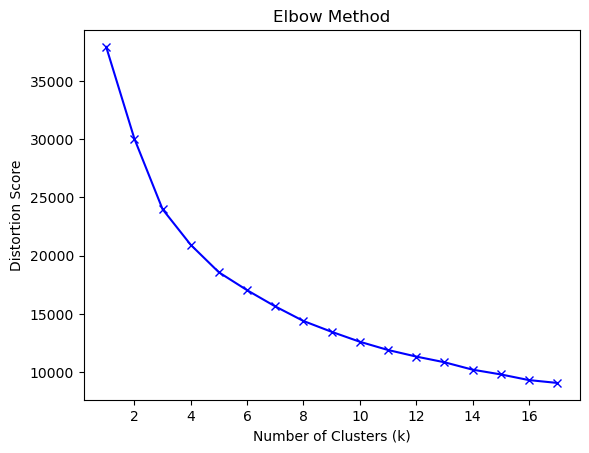

In [359]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select the numeric columns for clustering
numeric_columns = classification_data.select_dtypes(include=[np.float64]).columns

# Create a list to store the distortion scores
distortions = []

# Try different values of k
k_values = range(1, 18)
for k in k_values:
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(classification_data[numeric_columns])
    
    # Calculate the distortion score
    distortion = kmeans.inertia_
    distortions.append(distortion)

# Plot the elbow curve
plt.plot(k_values, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion Score')
plt.title('Elbow Method')
plt.show()


Number of clusters determined to be 3

In [360]:
# Perform clustering
X = classification_data.drop('name', axis=1)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Add cluster labels to the dataset
classification_data['cluster'] = cluster_labels

# Display cluster assignment and sample data points from each cluster
for cluster in range(3):
    print(f"Cluster {cluster}:\n")
    cluster_data = classification_data[classification_data['cluster'] == cluster]
    sample_data = cluster_data.sample(n=3)
    print(sample_data)
    print()

Cluster 0:

                    name  calories  total_fat   sat_fat  cholesterol  \
35006         쿠크다스화이트토르테  0.846152   1.290670  1.814981    -0.042640   
71703         바베큐치킨마요롤피자  0.916533  -0.306391  0.399252    -0.315814   
41995  화이트 컴파운드 GCW-3384  0.861452   1.534584  3.394063    -0.328575   

         sodium  total_carb   protein class  cluster_label  \
35006 -0.212722    0.514309 -0.089492  12.0              0   
71703  1.174276   -0.202540  1.043264  10.0              0   
41995 -0.483401    0.484792 -0.697062  12.0              0   

       closest_cluster_label  closest_cluster_distance  cluster  
35006                      0                  1.502177        0  
71703                      0                  2.275109        0  
41995                      0                  2.962078        0  

Cluster 1:

                                         name  calories  total_fat   sat_fat  \
19164  티라미슈 초코볼 화이트(TIRAMISU CHOCOBALL WHITE)  0.993035   1.929494  2.141688   
32300        

This part contains questions to use when actually implementing the model. By answering these questions, they recommend foods in 18 classes, as well as similar foods obtained through clustering.

In [ ]:
print_size = 5
answer = [1,2]
answer23 = [1,2,3]
answer_list = []

question1 = int(input("What is your gender? \n1) male \n2) female\n"))
while question1 not in answer :
  print("Please enter it again\n")
  print("\n------------------------------------\n")
  question1 = int(input("What is your gender? \n1) male \n2) female\n\n\n"))
print("\n------------------------------------\n")
answer_list.append(question1)

question2 = int(input("What is your age group? \n1) children and early teens \n2) late teens and 30s \n3) middle-aged and elderly\n"))
while question2 not in  answer23:
  print("Please enter it again\n")
  print("\n------------------------------------\n")
  question2 = int(input("What is your age group? \n1) children and early teens \n2) late teens and 30s \n3) middle-aged and elderly\n"))
print("\n------------------------------------\n")
answer_list.append(question2)

question3 = int(input("Choose the purpose of your food intake. \n1) Diet \n2) Building muscles \n3) To fill the recommended intake\n"))
while question3 not in answer :
  print("Please enter it again\n")
  print("\n------------------------------------\n")
  question3 = int(input("Choose the purpose of your food intake. \n1) Diet \n2) Building muscles \n3) To fill the recommended intake\n"))
print("\n------------------------------------\n")
answer_list.append(question3)




## Predict class by putting a different dataset into this model with random forest (fastfood.csv)

In [334]:
fastfood = pd.read_csv("fastfood.csv")
print(fastfood.head())

  restaurant                                       item  calories  cal_fat  \
0  Mcdonalds           Artisan Grilled Chicken Sandwich       380       60   
1  Mcdonalds             Single Bacon Smokehouse Burger       840      410   
2  Mcdonalds             Double Bacon Smokehouse Burger      1130      600   
3  Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750      280   
4  Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920      410   

   total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  \
0          7      2.0        0.0           95    1110          44    3.0   
1         45     17.0        1.5          130    1580          62    2.0   
2         67     27.0        3.0          220    1920          63    3.0   
3         31     10.0        0.5          155    1940          62    2.0   
4         45     12.0        0.5          120    1980          81    4.0   

   sugar  protein  vit_a  vit_c  calcium  salad  
0     11     37.0    4.0

Remove some variables from the given data and replace them with a form suitable for the random forest model.

In [335]:
selected_columns = ["item", "calories", "total_fat", "sat_fat","cholesterol", "sodium", "total_carb", "protein"]
fastfood_revised = fastfood[selected_columns]

# Print the new dataset
print(fastfood_revised.head())
print("\n")
print("Number of missing values per column")
print(fastfood_revised.isnull().sum())

                                        item  calories  total_fat  sat_fat  \
0           Artisan Grilled Chicken Sandwich       380          7      2.0   
1             Single Bacon Smokehouse Burger       840         45     17.0   
2             Double Bacon Smokehouse Burger      1130         67     27.0   
3  Grilled Bacon Smokehouse Chicken Sandwich       750         31     10.0   
4   Crispy Bacon Smokehouse Chicken Sandwich       920         45     12.0   

   cholesterol  sodium  total_carb  protein  
0           95    1110          44     37.0  
1          130    1580          62     46.0  
2          220    1920          63     70.0  
3          155    1940          62     55.0  
4          120    1980          81     46.0  


Number of missing values per column
item           0
calories       0
total_fat      0
sat_fat        0
cholesterol    0
sodium         0
total_carb     0
protein        1
dtype: int64


In [364]:
fastfood_revised.dropna(inplace = True)
print("Number of missing values per column after delete NA")
print(fastfood_revised.isnull().sum())

Number of missing values per column after delete NA
item           0
calories       0
total_fat      0
sat_fat        0
cholesterol    0
sodium         0
total_carb     0
protein        0
class          0
cluster        0
dtype: int64


In [341]:
fastfood_revised.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514 entries, 0 to 514
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item         514 non-null    object 
 1   calories     514 non-null    float64
 2   total_fat    514 non-null    float64
 3   sat_fat      514 non-null    float64
 4   cholesterol  514 non-null    float64
 5   sodium       514 non-null    float64
 6   total_carb   514 non-null    float64
 7   protein      514 non-null    float64
dtypes: float64(7), object(1)
memory usage: 36.1+ KB


Standardize fastfood_revised dataset for input to model

In [365]:
# Exclude columns 'name' because they are not scaled.
numeric_columns = fastfood_revised.columns[1:]

# Create StandardScaler objects and convert data for standardization
scaler = StandardScaler()
fastfood_revised.loc[:,numeric_columns] = scaler.fit_transform(fastfood_revised.loc[:,numeric_columns])

In [339]:
# After scaling fastfood_revised dataset
fastfood_revised

,item,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein
0,Artisan Grilled Chicken Sandwich,-0.532678,-1.067148,-0.961638,0.371322,-0.196178,-0.065626,0.515600
1,Single Bacon Smokehouse Burger,1.105541,1.013876,1.397327,0.935041,0.485928,0.658054,1.025032
2,Double Bacon Smokehouse Burger,2.138332,2.218679,2.969971,2.384605,0.979367,0.698258,2.383520
3,Grilled Bacon Smokehouse Chicken Sandwich,0.785020,0.247183,0.296477,1.337698,1.008392,0.658054,1.534465
4,Crispy Bacon Smokehouse Chicken Sandwich,1.390449,1.013876,0.611006,0.773978,1.066444,1.421938,1.025032
5,Big Mac,0.037138,0.082891,0.296477,0.129728,-0.428385,0.014783,-0.163644
6,Cheeseburger,-0.817585,-0.793329,-0.489845,-0.514523,-0.820233,-0.507874,-0.729680
7,Classic Chicken Sandwich,-0.069703,-0.136164,-0.647109,-0.111867,-0.297769,0.135397,-0.163644
8,Double Cheeseburger,-0.354610,-0.300455,0.453741,0.210259,-0.297769,-0.427465,-0.163644
9,Double Quarter Pounder® with Cheese,0.856247,1.013876,2.026385,1.659823,0.065054,-0.146034,1.308051


In [340]:
# Perform predictions
X_pred = fastfood_revised.drop(["item"], axis=1)
y_pred = rf_model.predict(X_pred)
print(y_pred)

[ 1.  3. 14. ... 12. 12. 12.]


In [343]:
fastfood_revised["class"] = y_pred

# Print the updated fastfood_revised DataFrame
fastfood_revised

<ipython-input-343-271d33e12916>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fastfood_revised["class"] = y_pred


,item,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,protein,class
0,Artisan Grilled Chicken Sandwich,-0.532678,-1.067148,-0.961638,0.371322,-0.196178,-0.065626,0.515600,1.0
1,Single Bacon Smokehouse Burger,1.105541,1.013876,1.397327,0.935041,0.485928,0.658054,1.025032,3.0
2,Double Bacon Smokehouse Burger,2.138332,2.218679,2.969971,2.384605,0.979367,0.698258,2.383520,14.0
3,Grilled Bacon Smokehouse Chicken Sandwich,0.785020,0.247183,0.296477,1.337698,1.008392,0.658054,1.534465,11.0
4,Crispy Bacon Smokehouse Chicken Sandwich,1.390449,1.013876,0.611006,0.773978,1.066444,1.421938,1.025032,6.0
5,Big Mac,0.037138,0.082891,0.296477,0.129728,-0.428385,0.014783,-0.163644,1.0
6,Cheeseburger,-0.817585,-0.793329,-0.489845,-0.514523,-0.820233,-0.507874,-0.729680,17.0
7,Classic Chicken Sandwich,-0.069703,-0.136164,-0.647109,-0.111867,-0.297769,0.135397,-0.163644,12.0
8,Double Cheeseburger,-0.354610,-0.300455,0.453741,0.210259,-0.297769,-0.427465,-0.163644,15.0
9,Double Quarter Pounder® with Cheese,0.856247,1.013876,2.026385,1.659823,0.065054,-0.146034,1.308051,10.0


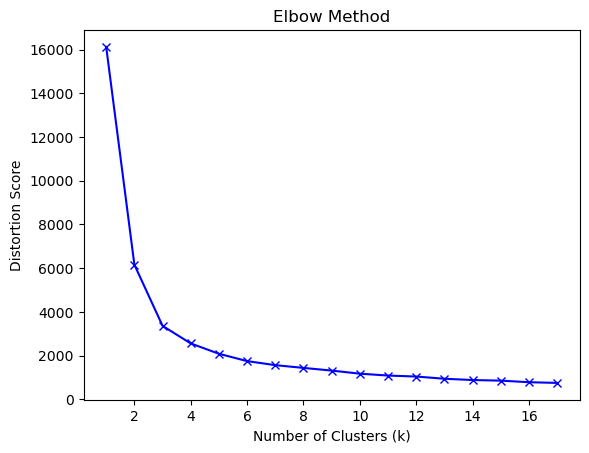

In [361]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select the numeric columns for clustering
numeric_columns = fastfood_revised.select_dtypes(include=[np.float64]).columns

# Create a list to store the distortion scores
distortions = []

# Try different values of k
k_values = range(1, 18)
for k in k_values:
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(fastfood_revised[numeric_columns])
    
    # Calculate the distortion score
    distortion = kmeans.inertia_
    distortions.append(distortion)

# Plot the elbow curve
plt.plot(k_values, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion Score')
plt.title('Elbow Method')
plt.show()


In [363]:
# Perform clustering
X = fastfood_revised.drop('item', axis=1)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Add cluster labels to the dataset
fastfood_revised['cluster'] = cluster_labels

# Display cluster assignment and sample data points from each cluster
for cluster in range(3):
    print(f"Cluster {cluster}:\n")
    cluster_data = fastfood_revised[fastfood_revised['cluster'] == cluster]
    sample_data = cluster_data.sample(n=3)
    print(sample_data)
    print()

Cluster 0:

                              item  calories  total_fat   sat_fat  \
260  Spicy Crispy Chicken Sandwich  0.606953   0.849584 -0.175316   
197                  Bacon King Jr  0.713793   0.685293  0.139213   
283           Crispy Fish Sandwich -0.212156  -0.245691 -0.804373   

     cholesterol    sodium  total_carb   protein  class  cluster  
260    -0.111867 -0.152640    0.457032 -0.163644   12.0        0  
197     0.290790  0.993879    0.698258  0.232581   12.0        0  
283    -0.836649 -0.051049    0.296214 -0.616473   12.0        0  

Cluster 1:

                                           item  calories  total_fat  \
34    3 piece Buttermilk Crispy Chicken Tenders -0.568291  -0.300455   
55   Premium Southwest Salad w/ Grilled Chicken -0.639518  -0.793329   
132               All Beef Regular Hot Dog – 6" -0.746358  -0.464746   

      sat_fat  cholesterol    sodium  total_carb   protein  class  cluster  
34  -0.725741    -0.031335 -0.486436   -1.191349  0.006167   15.